In [13]:
import sys
sys.path.append('/Users/gabesmithline/Desktop/SRG/melo_project/marketsim')
from egta.reductions.dpr import DPRGame
from egta.game import Game

import numpy as np
from collections import defaultdict
from egta.process_data import process_game_data
import random
import numpy as np

'''
test data
'''
#example payoff matrix for 6 agents and 2 strategies
"""
Melo  Lit   
0  6   | 0 50
1  5   | 50 10
2  4   | 30 20
3  3   | 50 50
4  2   | 40 70
5  1   | 10 100
6  0   | 100 0 
"""
#1 for 1 win, 0 for tie, -1 for loss
# 1 -> 2 -> 3 -> 1
rps_data = [ # nash equilibrium is [1/3, 1/3, 1/3] for this data, it is the check data
    [
        ['agent_1', 'ROCK', 0],      # Rock ties with Rock, loses to Paper
        ['agent_2', 'PAPER', 0],     # Paper beats Rock, ties with Paper
        ['agent_3', 'SCISSORS', 0]   # Scissors loses to Rock, beats Paper
    ],
    
    [
        ['agent_1', 'ROCK', -1],      # Rock loses to Paper
        ['agent_2', 'ROCK', -1],      # Rock loses to Paper
        ['agent_3', 'PAPER', 2]      # Paper beats two Rocks
    ],
    
    [
        ['agent_1', 'ROCK', 1],      # Rock beats Scissors
        ['agent_2', 'ROCK', 1],      # Rock beats Scissors
        ['agent_3', 'SCISSORS', -2]  # Scissors loses to two Rocks
    ],
    
    [
        ['agent_1', 'ROCK', -2],     # Rock loses to two Papers
        ['agent_2', 'PAPER', 1],     # Paper beats Rock
        ['agent_3', 'PAPER', 1]      # Paper beats Rock
    ],
    
    [
        ['agent_1', 'PAPER', -1],    # Paper loses to Scissors
        ['agent_2', 'PAPER', -1],    # Paper loses to Scissors
        ['agent_3', 'SCISSORS', 2]   # Scissors beats two Papers
    ],
    
    [
        ['agent_1', 'ROCK', 2],      # Rock beats two Scissors
        ['agent_2', 'SCISSORS', -1], # Scissors loses to Rock
        ['agent_3', 'SCISSORS', -1]  # Scissors loses to Rock
    ],
    
    [
        ['agent_1', 'PAPER', -2],    # Paper loses to two Scissors
        ['agent_2', 'SCISSORS', 1],  # Scissors beats Paper
        ['agent_3', 'SCISSORS', 1]   # Scissors beats Paper
    ],
    
    [
        ['agent_1', 'ROCK', 0],      # All tie
        ['agent_2', 'ROCK', 0],
        ['agent_3', 'ROCK', 0]
    ],
    
    [
        ['agent_1', 'PAPER', 0],     # All tie
        ['agent_2', 'PAPER', 0],
        ['agent_3', 'PAPER', 0]
    ],
    
    [
        ['agent_1', 'SCISSORS', 0],  # All tie
        ['agent_2', 'SCISSORS', 0],
        ['agent_3', 'SCISSORS', 0]
    ]
]


'''
expanded_rps_data = []

distributions = [
    [3, 0, 0], [0, 3, 0], [0, 0, 3],  
    [2, 1, 0], [2, 0, 1], [1, 2, 0], [0, 2, 1], [1, 0, 2], [0, 1, 2],  # Two of one, one of another
    [1, 1, 1], 
]


for _ in range(1000):  
    for dist in distributions:
        profile = []
        strategies = ['ROCK', 'PAPER', 'SCISSORS']
        
        # Create the profile based on distribution
        for i, count in enumerate(dist):
            for _ in range(count):
                # Determine the payoff with the RPS rules plus some small noise
                # Basic payoff
                strat = strategies[i]
                payoff = 0  # Default for ties
                
                # Count other strategies in this profile
                rock_count = dist[0] - (1 if strat == 'ROCK' else 0)
                paper_count = dist[1] - (1 if strat == 'PAPER' else 0)
                scissors_count = dist[2] - (1 if strat == 'SCISSORS' else 0)
                
                # Calculate payoff based on RPS rules
                if strat == 'ROCK':
                    payoff = scissors_count - paper_count
                elif strat == 'PAPER':
                    payoff = rock_count - scissors_count
                elif strat == 'SCISSORS':
                    payoff = paper_count - rock_count
                
                # Add some small noise (but maintain the core relationship)
                noise = np.random.normal(0, 0.1)  # Small Gaussian noise
                payoff = payoff + noise
                
                profile.append([f'agent_{len(profile)+1}', strat, payoff])
        
        expanded_rps_data.append(profile)

# Add the original data to ensure basic correctness
expanded_rps_data.extend(rps_data)
'''


"\nexpanded_rps_data = []\n\ndistributions = [\n    [3, 0, 0], [0, 3, 0], [0, 0, 3],  \n    [2, 1, 0], [2, 0, 1], [1, 2, 0], [0, 2, 1], [1, 0, 2], [0, 1, 2],  # Two of one, one of another\n    [1, 1, 1], \n]\n\n\nfor _ in range(1000):  \n    for dist in distributions:\n        profile = []\n        strategies = ['ROCK', 'PAPER', 'SCISSORS']\n        \n        # Create the profile based on distribution\n        for i, count in enumerate(dist):\n            for _ in range(count):\n                # Determine the payoff with the RPS rules plus some small noise\n                # Basic payoff\n                strat = strategies[i]\n                payoff = 0  # Default for ties\n                \n                # Count other strategies in this profile\n                rock_count = dist[0] - (1 if strat == 'ROCK' else 0)\n                paper_count = dist[1] - (1 if strat == 'PAPER' else 0)\n                scissors_count = dist[2] - (1 if strat == 'SCISSORS' else 0)\n                \n  

## Test data

In [14]:


# Print the size of the dataset
print(f"Generated dataset with {len(rps_data)} profiles")
game_single = process_game_data(rps_data)
for row in game_single.get_payoff_matrix():
    print(row)



Generated dataset with 10 profiles
['PAPER', 'ROCK', 'SCISSORS']
(('PAPER', 1), ('ROCK', 1), ('SCISSORS', 1))
[1, 1, 1] [0.0, 0.0, 0.0] PAPER
[1, 2, 0] [2.0, -1.0, 0] ROCK
[0, 2, 1] [0, 1.0, -2.0] SCISSORS
['# PAPER', '# ROCK', '# SCISSORS', 'Payoff (PAPER)', 'Payoff (ROCK)', 'Payoff (SCISSORS)']
[1, 1, 1, 0.0, 0.0, 0.0]
[1, 2, 0, 2.0, -1.0, 0]
[0, 2, 1, 0, 1.0, -2.0]
[2, 1, 0, 1.0, -2.0, 0]
[2, 0, 1, -1.0, 0, 2.0]
[0, 1, 2, 0, 2.0, -1.0]
[1, 0, 2, -2.0, 0, 1.0]
[0, 3, 0, 0, 0.0, 0]
[3, 0, 0, 0.0, 0, 0]
[0, 0, 3, 0, 0, 0.0]


In [15]:
dprgame = DPRGame(game_single, game_single.num_players, 3) #approximating 3 players with 2 players in test
print(dprgame.check_reduced_players_ratio())

#returns payos from payoff table in full game
dprgame.reduced_game.full_game.get_numeric_payoff_matrix()



True


array([[ 0.,  0.,  0.],
       [ 2., -1.,  0.],
       [ 0.,  1., -2.],
       [ 1., -2.,  0.],
       [-1.,  0.,  2.],
       [ 0.,  2., -1.],
       [-2.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

## Check Ratio Validator

Solving game with 3 strategies and 3 players
Iteration 0: [0.33333333 0.33333333 0.33333333]
Final Strategy: [0.33333333 0.33333333 0.33333333]
Regrets: [0. 0. 0.]
Nash Equilibrium: {'PAPER': 0.3333333333333333, 'ROCK': 0.3333333333333333, 'SCISSORS': 0.3333333333333333}
PAPER [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ROCK [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

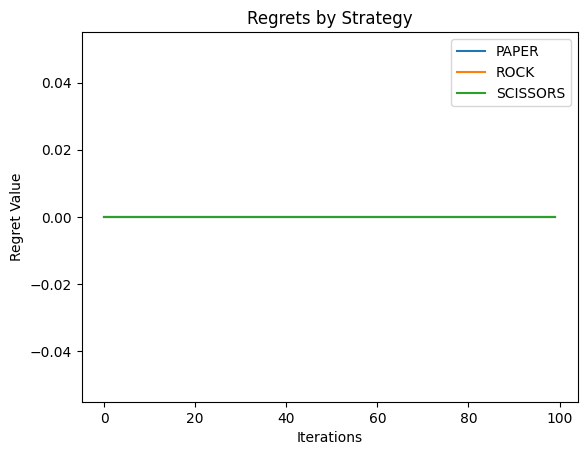

PAPER [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.33333333333

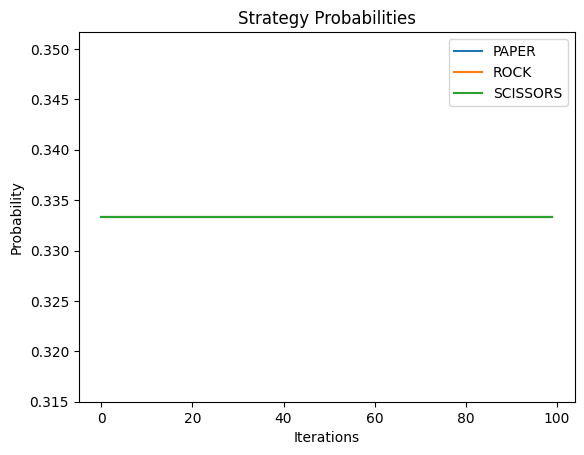

In [16]:
import matplotlib.pyplot as plt

#TODO: check this is correct
equilibrium, regrets, strategy_probs = dprgame.solve_reduced_game_cfr(iterations=100)
print("Nash Equilibrium:", equilibrium)
#graph regrets
# Plot regrets for each strategy separately
for key, value in regrets.items():
    print(key, value)
for strategy, regret_values in regrets.items():
    plt.plot(regret_values, label=strategy)
plt.title("Regrets by Strategy")
plt.xlabel("Iterations")
plt.ylabel("Regret Value")
plt.legend()
plt.show()

#graph strategy probabilities

for key, value in strategy_probs.items():
    print(key, value)

for strategy, prob_values in strategy_probs.items():
    plt.plot(prob_values, label=strategy)
plt.title("Strategy Probabilities")
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.legend()